In [1]:
from elec_bol20 import *
import elec_bol20.util as ebu


3

# info
Crea la transformación de cartograma para el modelo de predicciones

In [2]:

data = pd.read_excel(ebu.GEO_PATH_V1)
lalo = ['latitud', 'longitud']
data.groupby(lalo)
n = data.groupby(lalo)['latitud'].count()
n.name = 'repete'
_d = data.reset_index().set_index(lalo)
_d['repete'] = n
_d = _d.reset_index().set_index('index')
_d.loc[_d['repete']>1,'latitud'] = _d[_d['repete']>1]['latitud'] +\
                                   (np.random.random(1)-.5) * .05
_d.loc[_d['repete']>1,'longitud'] = _d[_d['repete']>1]['longitud'] + \
                                   (np.random.random(1)-.5) * .05
data = _d

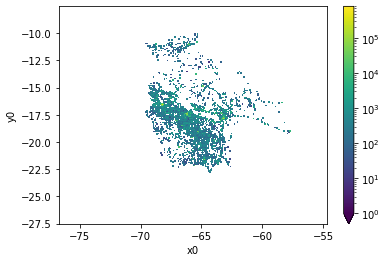

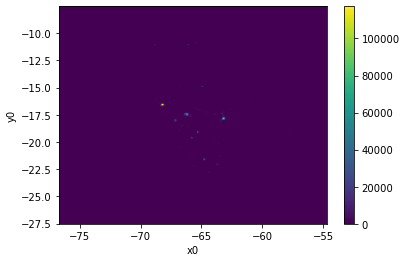

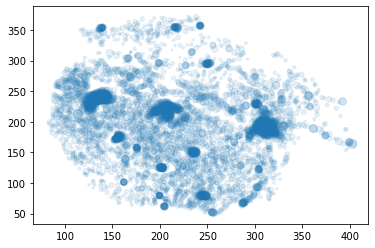

In [3]:
data = data[data['NombrePais'] == 'Bolivia']
data = data.rename({'latitud': 'y0', 'longitud': 'x0'}, axis=1)

N = ebu.hab
x0, y0 = 'x0', 'y0'
x1, y1 = 'x1', 'y1'
_r = .05
sigma_gauss = 1
data0 = data.copy()
x_range = 11
y_range = 10
fun = lambda ds: ds**(1/2)+3

ndf = ebu.get_carto_df(
    N, _r, data0, sigma_gauss,
    x0, x1, x_range,
    y0, y1, y_range,
    fun
)

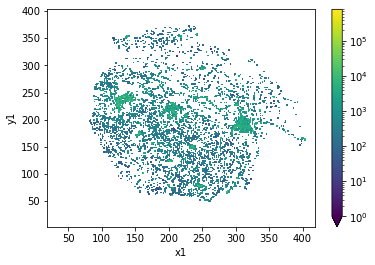

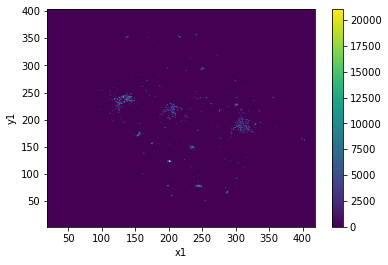

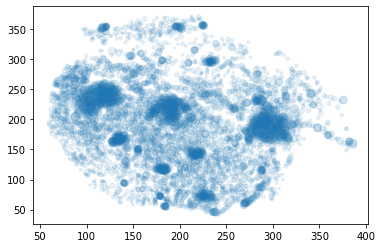

In [4]:
x0, y0 = 'x1', 'y1'
x1, y1 = 'x2', 'y2'
_r = 1
sigma_gauss = .5
data0 = ndf.copy()
x_range =200
y_range = 200
fun = lambda ds: ds+1000

ndf1 = ebu.get_carto_df(
    N, _r, data0, sigma_gauss,
    x0, x1, x_range,
    y0, y1, y_range,
    fun
)

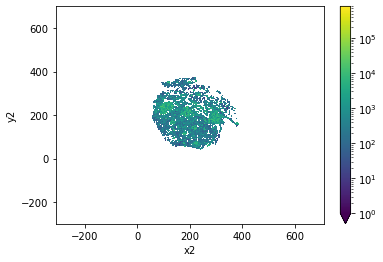

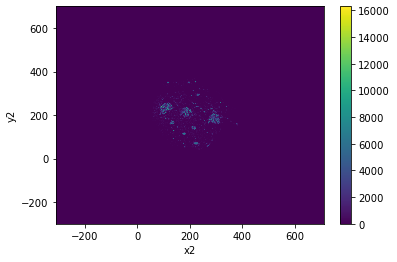

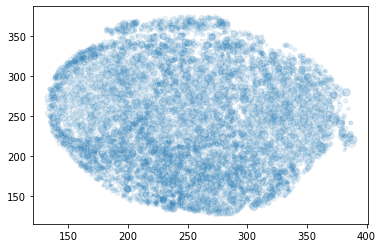

In [5]:
x0, y0 = 'x2', 'y2'
x1, y1 = 'x3', 'y3'
_r = 2
sigma_gauss = .5
data0 = ndf1.copy()
x_range = 510
y_range = 500
fun = lambda ds: ds+200

ndf2 = ebu.get_carto_df(
    N, _r, data0, sigma_gauss,
    x0, x1, x_range,
    y0, y1, y_range,
    fun
)

In [6]:
ndf


,y0,x0,pais,NombrePais,dep,nomdep,prov,nomprov,sec,nombremunicipio,...,TipoCircunscripcion,RECI,nombrerecinto,nHabilitados,temporary,FID,Dirección,repete,x1,y1
index,,,,,,,,,,,,,,,,,,,,,
0,-14.634690,-64.802950,NaN,Bolivia,8,Beni,1,Cercado,2,San Javier,...,Uninominal,2,Escuela Espiritu Santo,60,0.0,4965,Espiritu Santo,1,257.640805,302.899764
1,-14.588630,-64.208070,NaN,Bolivia,8,Beni,1,Cercado,2,San Javier,...,Uninominal,1,U.E. La Curva,133,0.0,4970,La Curva,1,275.873270,299.224588
2,-14.638610,-64.630570,NaN,Bolivia,8,Beni,1,Cercado,2,San Javier,...,Uninominal,2,Escuela Laguna Colorada,57,0.0,4966,Laguna Colorada,1,263.755365,301.340395
3,-14.672090,-64.335500,NaN,Bolivia,8,Beni,1,Cercado,2,San Javier,...,Uninominal,2,Escuela Nueva Israel,624,0.0,4967,Nueva Israel,1,272.376083,298.120142
4,-14.491830,-64.083760,NaN,Bolivia,8,Beni,1,Cercado,2,San Javier,...,Uninominal,1,Escuela Pedro Ignacio Muiba,219,0.0,4969,Pedro Ignacio Muiba,1,278.210889,300.546397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5317,-21.732400,-64.058890,NaN,Bolivia,6,Tarija,6,O' Connor,1,Entre Ríos,...,Uninominal,1,U.E. Vallecito de los Lapachos,195,0.0,3859,Vallecito de Los Lapach,1,274.036284,75.442865
5318,-21.174039,-63.771302,NaN,Bolivia,6,Tarija,6,O' Connor,1,Entre Ríos,...,Especial,2,U.E. Mistolar,286,0.0,3854,Yuati,1,288.421346,95.074873
5319,-21.048850,-63.979970,NaN,Bolivia,6,Tarija,6,O' Connor,1,Entre Ríos,...,Uninominal,1,U.E. Yukimbia,195,0.0,3865,Yukimbia,1,282.109734,97.673788
